In [1]:
import pandas as pd

# Cargar los datos
df_demo = pd.read_csv('data/df_final_demo.txt', delimiter=',')
df_experiment = pd.read_csv('data/df_final_experiment_clients.txt', delimiter=',')
df_web_data_pt1 = pd.read_csv('data/df_final_web_data_pt_1.txt', delimiter=',')
df_web_data_pt2 = pd.read_csv('data/df_final_web_data_pt_2.txt', delimiter=',')

# Mostrar las primeras filas y la información de cada DataFrame
print("df_final_demo:")
print(df_demo.head())
print(df_demo.info())

print("df_final_experiment_clients:")
print(df_experiment.head())
print(df_experiment.info())

print("df_final_web_data_pt_1:")
print(df_web_data_pt1.head())
print(df_web_data_pt1.info())

print("df_final_web_data_pt_2:")
print(df_web_data_pt2.head())
print(df_web_data_pt2.info())


df_final_demo:
   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30           6.0            9.0  
2   52467.79           6.0            9.0  
3   67454.65           3.0            6.0  
4  103671.75           0.0            3.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt

In [2]:
# Limpieza de df_final_demo
def clean_demo(df):
    # Verificar valores nulos
    print(df.isnull().sum())
    
    # Normalizar valores de género
    df['gendr'] = df['gendr'].str.strip().str.lower()
    
    # Convertir 'bal' a tipo numérico
    df['bal'] = pd.to_numeric(df['bal'], errors='coerce')
    
    # Verificar datos duplicados
    df.drop_duplicates(inplace=True)
    
    return df

# Limpieza de df_final_experiment_clients
def clean_experiment(df):
    # Verificar valores nulos
    print(df.isnull().sum())
    
    # Asegurarse de que todos los 'client_id' están en df_final_demo
    assert df['client_id'].isin(df_demo['client_id']).all()
    
    return df

# Limpieza y unificación de df_final_web_data_pt1 y df_final_web_data_pt2
def clean_web_data(df1, df2):
    # Unir los dos DataFrames
    df = pd.concat([df1, df2])
    
    # Convertir 'date_time' a datetime
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    # Eliminar duplicados
    df.drop_duplicates(inplace=True)
    
    return df

df_demo = clean_demo(df_demo)
df_experiment = clean_experiment(df_experiment)
df_web_data = clean_web_data(df_web_data_pt1, df_web_data_pt2)


client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
client_id        0
Variation    20109
dtype: int64


Distribución por género:
gendr
u    24122
m    23724
f    22746
x        3
Name: count, dtype: int64


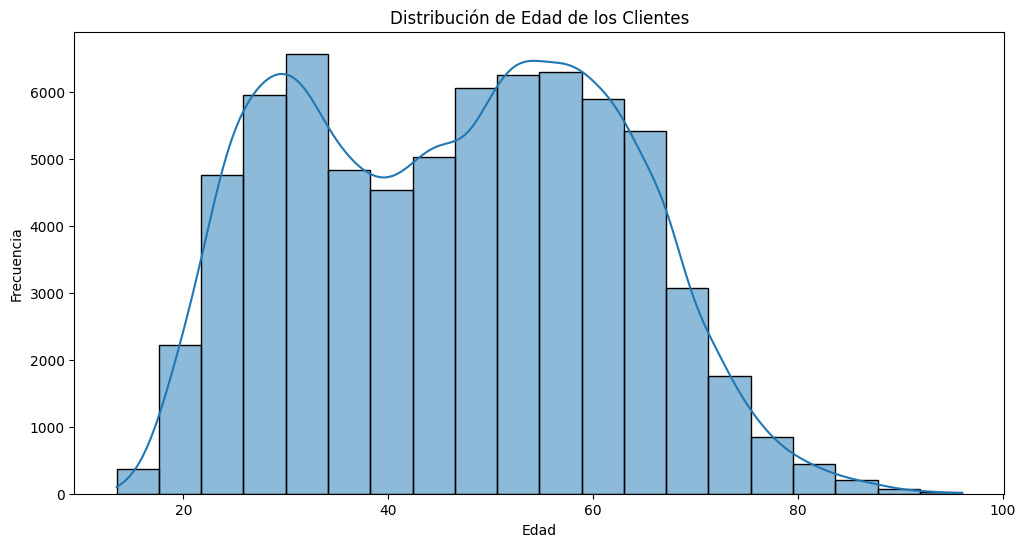

process_step
confirm   1 days 16:49:37.872251380
start     0 days 05:33:48.929889063
step_1    0 days 02:14:46.072280201
step_2    0 days 00:38:28.825951035
step_3    0 days 01:15:56.103433134
Name: step_duration, dtype: timedelta64[ns]


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis demográfico
def demographic_analysis(df):
    print("Distribución por género:")
    print(df['gendr'].value_counts())
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['clnt_age'], bins=20, kde=True)
    plt.title('Distribución de Edad de los Clientes')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.show()

# Análisis del comportamiento del cliente
def behavior_analysis(df):
    # Por ejemplo, podemos calcular el promedio de tiempo en cada paso
    df['step_duration'] = df.groupby('client_id')['date_time'].diff().fillna(pd.Timedelta(seconds=0))
    avg_step_duration = df.groupby('process_step')['step_duration'].mean()
    print(avg_step_duration)

demographic_analysis(df_demo)
behavior_analysis(df_web_data)


Distribución por género:
gendr
u    24122
m    23724
f    22746
x        3
Name: count, dtype: int64


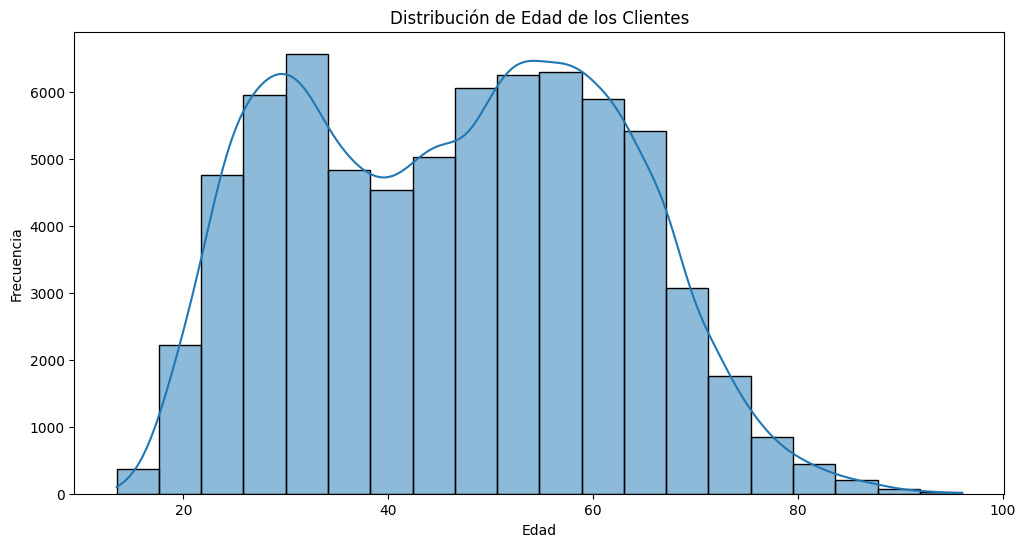

process_step
confirm   1 days 16:49:37.872251380
start     0 days 05:33:48.929889063
step_1    0 days 02:14:46.072280201
step_2    0 days 00:38:28.825951035
step_3    0 days 01:15:56.103433134
Name: step_duration, dtype: timedelta64[ns]


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis demográfico
def demographic_analysis(df):
    print("Distribución por género:")
    print(df['gendr'].value_counts())
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['clnt_age'], bins=20, kde=True)
    plt.title('Distribución de Edad de los Clientes')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.show()

# Análisis del comportamiento del cliente
def behavior_analysis(df):
    # Por ejemplo, podemos calcular el promedio de tiempo en cada paso
    df['step_duration'] = df.groupby('client_id')['date_time'].diff().fillna(pd.Timedelta(seconds=0))
    avg_step_duration = df.groupby('process_step')['step_duration'].mean()
    print(avg_step_duration)

demographic_analysis(df_demo)
behavior_analysis(df_web_data)


In [5]:
def calculate_kpis(df):
    # Calcular tasa de finalización
    completion_rate = df[df['process_step'] == 'confirm'].shape[0] / df['client_id'].nunique()
    
    # Calcular tiempo promedio por paso
    avg_time_per_step = df.groupby('process_step')['step_duration'].mean()
    
    return completion_rate, avg_time_per_step

completion_rate, avg_time_per_step = calculate_kpis(df_web_data)
print(f"Tasa de Finalización: {completion_rate}")
print(f"Tiempo Promedio por Paso:\n{avg_time_per_step}")


Tasa de Finalización: 0.8531005268107559
Tiempo Promedio por Paso:
process_step
confirm   1 days 16:49:37.872251380
start     0 days 05:33:48.929889063
step_1    0 days 02:14:46.072280201
step_2    0 days 00:38:28.825951035
step_3    0 days 01:15:56.103433134
Name: step_duration, dtype: timedelta64[ns]


In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

# Cargar los datos
df_demo = pd.read_csv('data/df_final_demo.txt')
df_experiment = pd.read_csv('data/df_final_experiment_clients.txt')
df_web_data_pt_1 = pd.read_csv('data/df_final_web_data_pt_1.txt')
df_web_data_pt_2 = pd.read_csv('data/df_final_web_data_pt_2.txt')

# Combinar las dos partes de los datos web
df_web_data = pd.concat([df_web_data_pt_1, df_web_data_pt_2], ignore_index=True)

# Función para calcular tasas de finalización y realizar la prueba
def test_hypothesis(df_control, df_test):
    # Calcular el número de confirmaciones y total de usuarios
    control_total = df_control['client_id'].nunique()
    test_total = df_test['client_id'].nunique()
    control_confirmations = df_control[df_control['process_step'] == 'confirm'].shape[0]
    test_confirmations = df_test[df_test['process_step'] == 'confirm'].shape[0]
    
    # Construir la tabla de contingencia
    contingency_table = [
        [control_confirmations, control_total - control_confirmations],
        [test_confirmations, test_total - test_confirmations]
    ]
    
    # Realizar la prueba chi-cuadrado
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Calcular tasas de finalización
    control_completion = control_confirmations / control_total
    test_completion = test_confirmations / test_total
    
    return control_completion, test_completion, p_value

# Dividir los datos en grupos Control y Test
control_df = df_web_data[df_web_data['client_id'].isin(df_experiment[df_experiment['Variation'] == 'Control']['client_id'])]
test_df = df_web_data[df_web_data['client_id'].isin(df_experiment[df_experiment['Variation'] == 'Test']['client_id'])]

# Realizar la prueba de hipótesis
control_completion, test_completion, p_value = test_hypothesis(control_df, test_df)

print(f"Tasa de Finalización Control: {control_completion}")
print(f"Tasa de Finalización Test: {test_completion}")
print(f"P-Value: {p_value}")


Tasa de Finalización Control: 0.7438806731259562
Tasa de Finalización Test: 0.9537970928507861
P-Value: 0.0


In [10]:
import pandas as pd
from scipy.stats import chi2_contingency

# Cargar los datos
df_demo = pd.read_csv('data/df_final_demo.txt')
df_experiment = pd.read_csv('data/df_final_experiment_clients.txt')
df_web_data_pt_1 = pd.read_csv('data/df_final_web_data_pt_1.txt')
df_web_data_pt_2 = pd.read_csv('data/df_final_web_data_pt_2.txt')

# Combinar las dos partes de los datos web
df_web_data = pd.concat([df_web_data_pt_1, df_web_data_pt_2], ignore_index=True)

# Función para calcular tasas de finalización y realizar la prueba
def test_hypothesis(df_control, df_test):
    # Calcular el número de confirmaciones y total de usuarios
    control_total = df_control['client_id'].nunique()
    test_total = df_test['client_id'].nunique()
    control_confirmations = df_control[df_control['process_step'] == 'confirm'].shape[0]
    test_confirmations = df_test[df_test['process_step'] == 'confirm'].shape[0]
    
    # Construir la tabla de contingencia
    contingency_table = [
        [control_confirmations, control_total - control_confirmations],
        [test_confirmations, test_total - test_confirmations]
    ]
    
    # Realizar la prueba chi-cuadrado
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Calcular tasas de finalización
    control_completion = control_confirmations / control_total
    test_completion = test_confirmations / test_total
    
    return control_completion, test_completion, p_value

# Dividir los datos en grupos Control y Test
control_df = df_web_data[df_web_data['client_id'].isin(df_experiment[df_experiment['Variation'] == 'Control']['client_id'])]
test_df = df_web_data[df_web_data['client_id'].isin(df_experiment[df_experiment['Variation'] == 'Test']['client_id'])]

# Realizar la prueba de hipótesis
control_completion, test_completion, p_value = test_hypothesis(control_df, test_df)

print(f"Tasa de Finalización Control: {control_completion}")
print(f"Tasa de Finalización Test: {test_completion}")
print(f"P-Value: {p_value}")


Tasa de Finalización Control: 0.7438806731259562
Tasa de Finalización Test: 0.9537970928507861
P-Value: 0.0


In [14]:
import pandas as pd

# Cargar el archivo .txt
df_final_demo = pd.read_csv('data/df_final_demo.txt', delimiter=',')

# Contar el número de client_id únicos
unique_client_ids = df_final_demo['client_id'].nunique()

print(f"El número de client_id únicos es: {unique_client_ids}")


El número de client_id únicos es: 70609
